# Example - Programming Languages
---

This example will be scraping and analysing the top 20 search results for 5 different programming languages (Python, Javascript, Java, PHP & C++) as of January 2019

## Requirements
* IPython
* Python 3.7
* nbextensions - Python Markdown

## Setup
This will be using the video_scrape.py script to scrape the top 20 search results for each programming language and put them into a csv file.

### Youtube API
This will also be using the Youtube API to get the statistics for each video...
It'll be storing various data and statistics for each video. This includes:
* Date Published
* Video Title & ID
* Name of uploader and Channel ID
* View Count (if enabled)
* Comment Count (if enabled)
* Like & Dislike Count (if enabled)
* Livestream or not live

In [1]:
# %load video_scrape.py
import requests
import configparser
import csv
import json
from time import sleep
from bs4 import BeautifulSoup

config = configparser.ConfigParser()
config.read('config.ini')

API_KEY = config['client']['api_key']
VIDEO_INFO_URL = config['base_url']['video_info']
SEARCH_QUERY_URL = config['base_url']['search_query']
CSV_FILE = config['file']['csv']

# Stores video information in csv
def video_info(video_id, keyword=None):
    url = requests.get(VIDEO_INFO_URL .format(id=video_id, key=API_KEY))
    sleep(1)
    data = url.json()

    # Details of the video
    keyword = keyword.replace("%23", "#")
    keyword = keyword.replace("+", " ")
    keyword = keyword.replace("%2B", "+")
    video_info = data['items'][0]
    video_published = video_info['snippet']['publishedAt'][:10]
    video_channel, video_channel_id = video_info['snippet']['channelTitle'], video_info['snippet']['channelId']
    video_title = video_info['snippet']['title']
    try:
        video_views = video_info['statistics']['viewCount']
        views_disabled = False
    except KeyError:
        video_views = "0"
        views_disabled = True
    try:
        video_likes, video_dislikes = int(video_info['statistics']['likeCount']), int(video_info['statistics']['dislikeCount'])
        video_rating = (video_likes/(video_likes+video_dislikes))*100
        ratings_disabled = False
    except KeyError:
        video_likes = video_dislikes = 0
        video_rating = 0
        ratings_disabled = True
    try:
        video_comments = video_info['statistics']['commentCount']
        comments_disabled = False
    except KeyError:
        video_comments = "0"
        comments_disabled = True
    is_live = video_info['snippet']['liveBroadcastContent']

    video_data = [video_id, video_published, video_title, video_channel_id, video_channel,
    video_views, video_rating, video_likes, video_dislikes, video_comments, views_disabled,
    ratings_disabled, comments_disabled, is_live, keyword]

    with open(CSV_FILE, 'a', encoding="utf-8") as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(video_data)

    return

# Collect top 20 videos with specific keyword in the title
def collect_keyword_search(keyword=None):
    if not keyword:
        keyword = input("Enter keyword to search... ").lower()
    keyword = keyword.replace("#", "%23")
    keyword = keyword.replace("+", "%2B")
    keyword = keyword.replace(" ", "+")
    url = requests.get(SEARCH_QUERY_URL .format(keyword))
    print("Fetching videos...\n")
    sleep(1)
    src = url.content
    soup = BeautifulSoup(src, 'lxml')
    videos = soup.findAll(class_='yt-uix-tile-link')
    print("Adding videos to csv...\n")
    for video in videos:
        if "/watch?v=" in video['href']:
            video_id = video['href'][9:]
            video_info(video_id, keyword)
    return

for keyword in ['python', 'javascript', 'java', 'c++', 'php']:
    collect_keyword_search(keyword)
    print("CSV has been updated...")

Fetching videos...

Adding videos to csv...

CSV has been updated...
Fetching videos...

Adding videos to csv...

CSV has been updated...
Fetching videos...

Adding videos to csv...

CSV has been updated...
Fetching videos...

Adding videos to csv...

CSV has been updated...
Fetching videos...

Adding videos to csv...

CSV has been updated...


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [3]:
data = pd.read_csv(CSV_FILE)
data

,video_id,date_published,video_title,channel_id,channel_title,views_count,video_rating,likes_count,dislikes_count,comments_count,views_disabled,ratings_disabled,comments_disabled,is_live,keyword
0,rfscVS0vtbw,2018-07-11,Learn Python - Full Course for Beginners,UC8butISFwT-Wl7EV0hUK0BQ,freeCodeCamp.org,3821418,98.775914,96913,1201,5285,False,False,False,none,python
1,kLZuut1fYzQ,2018-06-22,What Can You Do with Python? - The 3 Main Appl...,UCxX9wt5FWQUAAz4UrysqK9A,CS Dojo,860338,98.498617,27423,418,1128,False,False,False,none,python
2,7UeRnuGo-pg,2018-12-13,Python - 2019 Action plan to learn it - Step b...,UCXgGY0wkgOzynnHvSEVmE3A,Hitesh Choudhary,143584,95.922876,4776,203,670,False,False,False,none,python
3,f79MRyMsjrQ,2018-10-22,Python Tutorial for Programmers - Python Crash...,UCWv7vMbMWH4-V0ZXdmDpPBA,Programming with Mosh,104885,98.192276,2390,44,378,False,False,False,none,python
4,Z1Yd7upQsXY,2017-12-26,Python Tutorial for Absolute Beginners #1 - Wh...,UCxX9wt5FWQUAAz4UrysqK9A,CS Dojo,2587767,98.441908,51998,823,3767,False,False,False,none,python
5,N4mEzFDjqtA,2014-11-10,Python Programming,UCwRXb5dUK4cvsHbx-rGzSgw,Derek Banas,4919040,97.683528,66332,1573,7042,False,False,False,none,python
6,38WMvY6F4FE,2018-09-17,【Schoo】Pythonで学ぶ機械学習/ディープラーニング実践 -第1回 基礎編- | 金...,UCDS0UdkOIYJNRiDFmnowJIA,Schoo,6066,94.915254,56,3,4,False,False,False,none,python
7,ZDa-Z5JzLYM,2016-06-20,Python OOP Tutorial 1: Classes and Instances,UCCezIgC97PvUuR4_gbFUs5g,Corey Schafer,951831,99.365921,25857,165,1384,False,False,False,none,python
8,q6Mc_sAPZ2Y,2018-01-31,Become an Excel Wizard With Python,UCtxCXg-UvSnTKPOzLH4wJaQ,Coding Tech,204008,95.005899,2416,127,148,False,False,False,none,python
9,7lmCu8wz8ro,2017-08-02,What Does It Take To Be An Expert At Python?,UCtxCXg-UvSnTKPOzLH4wJaQ,Coding Tech,867270,97.025513,16277,499,959,False,False,False,none,python


In [4]:
python, javascript, java, c, php = data[data.keyword == "python"],\
data[data.keyword == "javascript"], data[data.keyword == "java"],\
data[data.keyword == "c++"], data[data.keyword == "php"]
colours = ['royalblue', 'goldenrod','seagreen', 'firebrick', 'mediumpurple']
all_keywords = [keyword.title() for keyword in dict.fromkeys(data.keyword)]

# Truncate text (e.g. video titles) if necessary
def truncate_list(lst):
    truncated_text = []
    for text in lst:
         truncated_text.append((text[:10] + '..') if len(text) > 10 else text)
    return truncated_text

## Visualizing view count - All Keywords
Let's first visualise the combined view count for each keyword using a bar chart...

In [5]:
x = all_keywords
y = {'python': sum(python.views_count), 'javascript': sum(javascript.views_count), 'java': sum(java.views_count),\
     'c': sum(c.views_count), 'php': sum(php.views_count)}

most_viewed, most_viewed_count = max(y).title(), format(max(y.values()), ",d")

From the data we can see that, **{{most_viewed}} has the highest combined view count with {{most_viewed_count}} views**... 

One reason for this could just be that {{most_viewed}} videos are simply more popular. On the contrary, there could also be other factors that affect these results, such as, when the videos were actually published or if a video have views/ratings disabled or if it's a livestream...

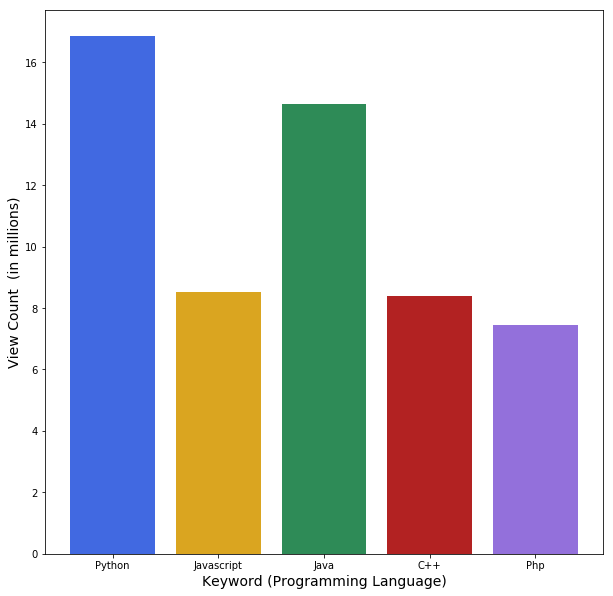

In [6]:
for i, (key, val) in enumerate(y.items()):
    y[key] = val/10**6
plt.figure(num=1, figsize=(10,10))
plt.bar(x, y.values(), color=colours)
plt.xlabel('Keyword (Programming Language)', fontsize=14)
plt.ylabel('View Count  (in millions)', fontsize=14)
plt.show()

## Visualizing video count

**Disclaimer**: This data was taken on January 2019 and, as such, will not be fully complete for 2019.

Let's use a histogram to show the distribution of the top searches by year. We'll take the year from the 'date_published' column of each row and plot it on the graph according to it's keyword.

In [7]:
python_year = [int(videos[:4]) for videos in python.date_published]
javascript_year = [int(videos[:4]) for videos in javascript.date_published]
java_year = [int(videos[:4]) for videos in java.date_published]
c_year = [int(videos[:4]) for videos in c.date_published]
php_year = [int(videos[:4]) for videos in php.date_published]

all_years = [python_year, javascript_year, java_year, c_year, php_year]
min_year = 2020
for years in all_years:
    if min(years) < min_year: min_year = min(years)

From the data, we see that most of the top search results have been published recently within the past 2 years. This suggests that videos, for all programming languages, have been increasing in uploads.

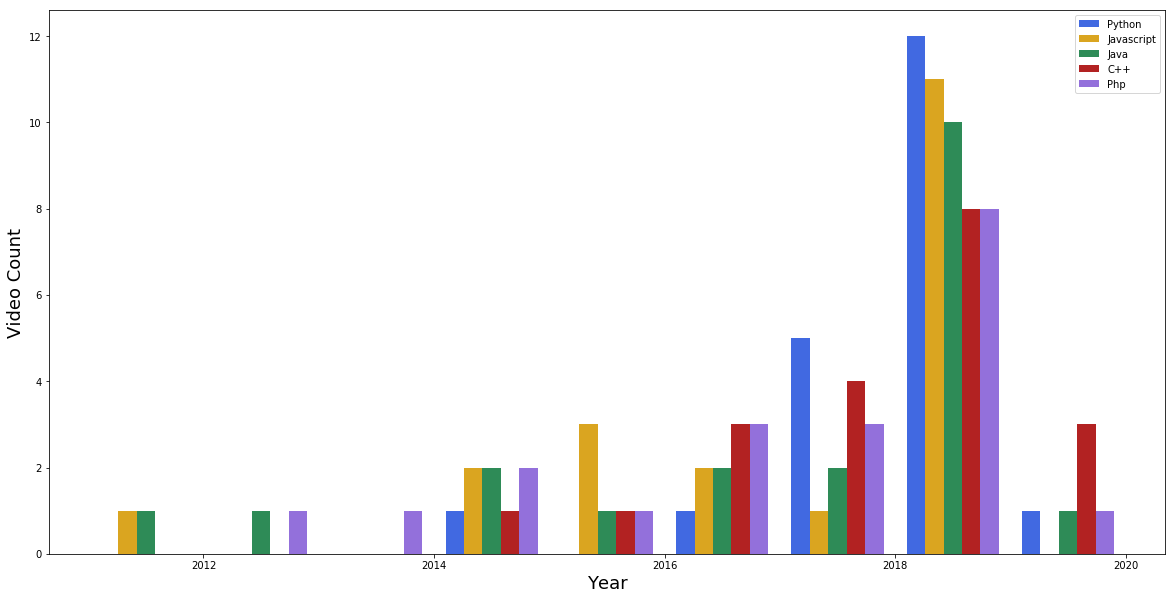

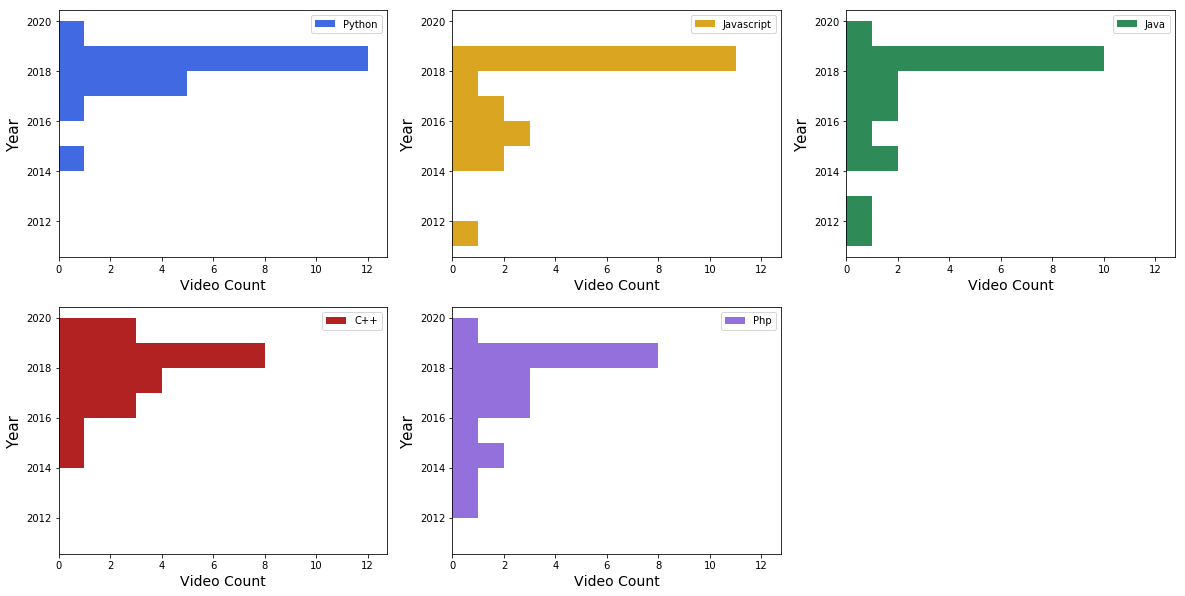

In [8]:
bins = list(range(min_year, 2021))
plt.figure(num=2, figsize=(20,10))
plt.hist(all_years, bins, color=colours)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Video Count', fontsize=18)
plt.legend(all_keywords)
plt.show()
plt.figure(num=3, figsize=(20,10))
for lang_year, n, colour, legend in zip(all_years, range(1,6), colours, all_keywords):
    plt.subplot(2, 3, n)
    axes = plt.gca()
    axes.set_xlim([None,12.75])
    plt.hist(lang_year, bins, orientation="horizontal", color=colour, label=legend)
    plt.xlabel('Video Count', fontsize=14)
    plt.ylabel('Year', fontsize=15)
    plt.legend()
plt.show()

## Visualizing Python
Next, let's look into one of the keyword search in more detail. Since this script is ran in Python, we'll go with that...

### Visualizing view count - Python
First we'll check the distribustion of views for the top search results in Python. Python had a high combined view count, however, this might be due to one popular video rather than all of them.

In [9]:
most_viewed_count = format(max(python.views_count), ",d")
most_viewed = str(list(python[data.views_count == max(python.views_count)].video_title)[0])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


The bar chart shows a fairly large variation in views between the top search results, with the majority of videos having less than 1 million views. **"{{most_viewed}}" is the most viewed python video with {{most_viewed_count}} views.**

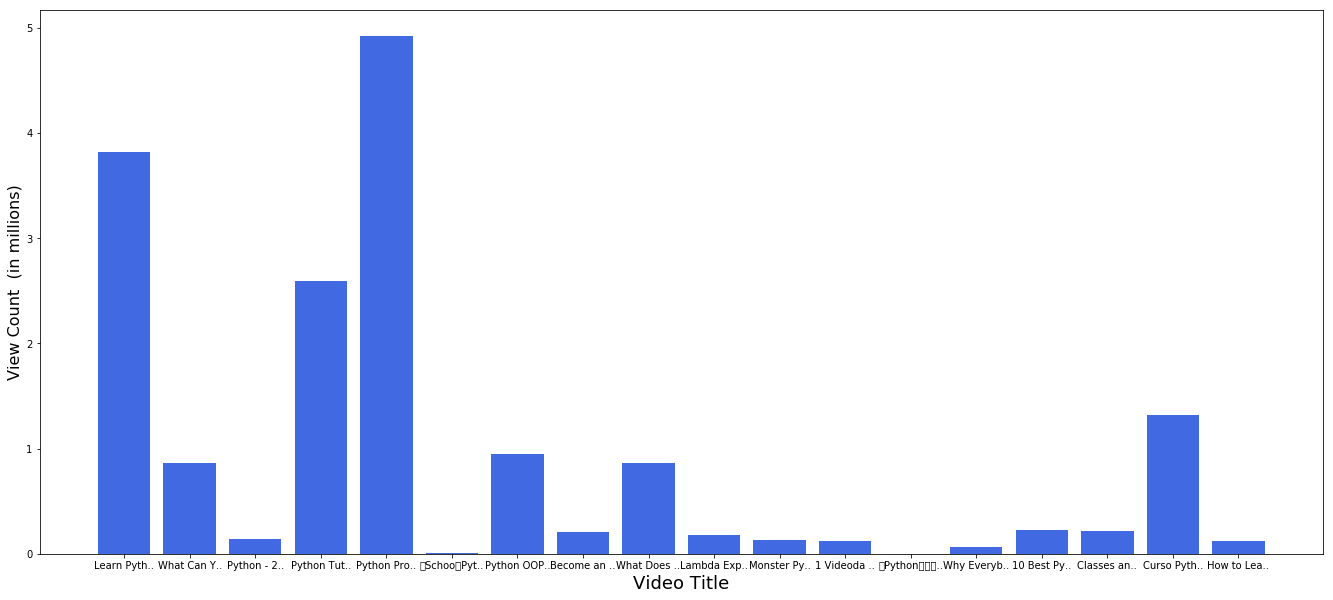

In [10]:
plt.figure(num=4, figsize=(23,10))
plt.bar(truncate_list(python.video_title), python.views_count/10**6, color='royalblue')
plt.xlabel('Video Title', fontsize=18)
plt.ylabel('View Count  (in millions)', fontsize=16)
plt.show()

### Channel video count analysis
Are the top videos mainly dominated by a specific channel? Let's visualise the data to see the distribution of channels.

This will count the number of times a specific channel appears on the top search result when searching up Python. *Note: For this example, we're assuming that there aren't multiple channels with the same name*

In [11]:
channels = dict.fromkeys(python.channel_title, 0)
for channel in channels:
    channels[channel] = list(python.channel_title).count(channel)
    
output = ""
if len(channels) > 14:
    output = "The data shows a even distribution between channels."
elif len(channels) > 9:
    output = "The data shows a somewhat even distribution between channels."
else:
    output = "The data shows a uneven distribution between channels."
if list(channels.values()).count(max(channels.values())) == 1:
    output += " **{}** has the most videos in the top search results with **{}** videos.".format(max(channels, key=channels.get), max(channels.values()))

{{output}} Python videos are uploaded by various channels based on the top results.

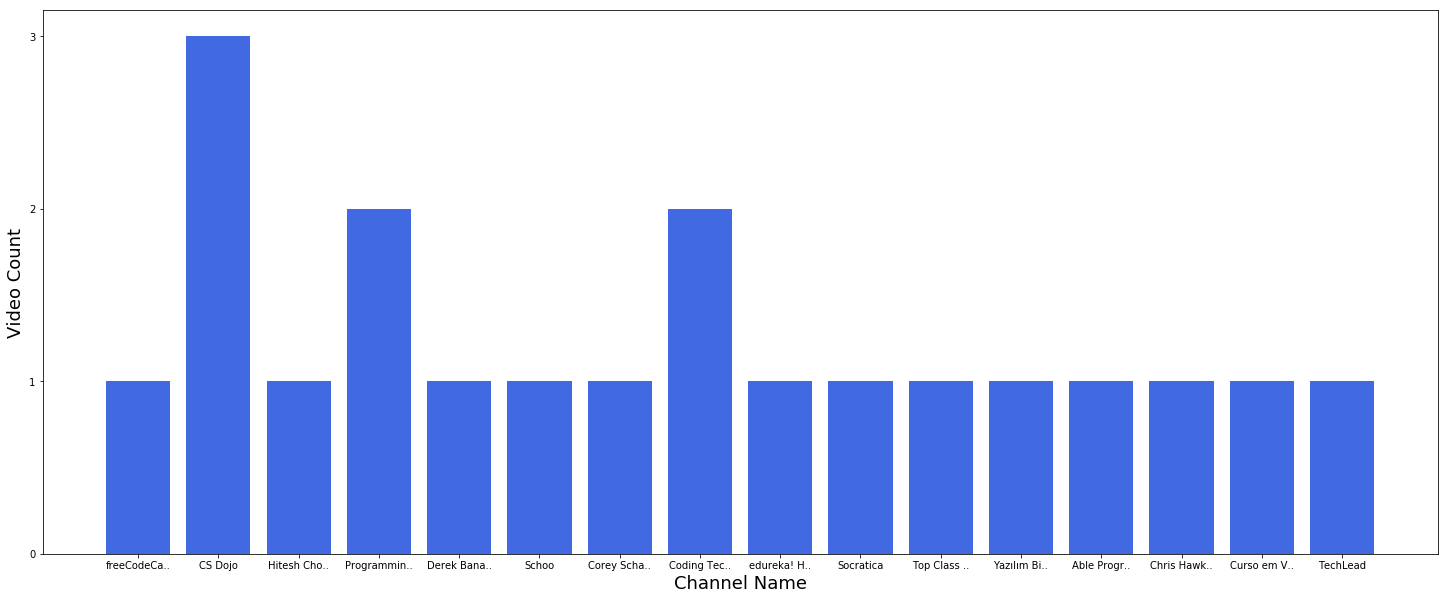

In [12]:
plt.figure(num=2, figsize=(25,10))
plt.bar(truncate_list(channels), channels.values(), color='royalblue')
plt.xlabel('Channel Name', fontsize=18)
plt.ylabel('Video Count', fontsize=18)
a = plt.gca()
a.set_yticks(range(0,1+max(channels.values())))
plt.show()

## Statistics
### Enabled/Disabled
Finally, let's take a look at all the videos in the csv file and see how many have either their views, ratings or comments disabled. There shouldn't be many (if any) videos with any of these disabled as channels usually don't disable anything.

In [13]:
output = ""
y = []
abnormality = False

for stats_disabled in [data.views_disabled, data.ratings_disabled, data.comments_disabled]:
    temp = len(data[data.views_disabled == True])
    y.append(temp)
    if temp > 10:
        abnormality = True

if any(y):
    if abnormality:
        output = "There seems to be a disproportionate amount of videos with their statistics disabled. \
        This is uncommon amoung videos generally and might be specific for programming videos."
    else:
        output = "Only a few videos have their statistics disabled. \
        This is common as most videos don't disable comments or ratings."
else:
    output = "It looks like none of the videos have any of their statistics disabled. \
    This should be expected as most videos don't disable comments or ratings."

{{output}}

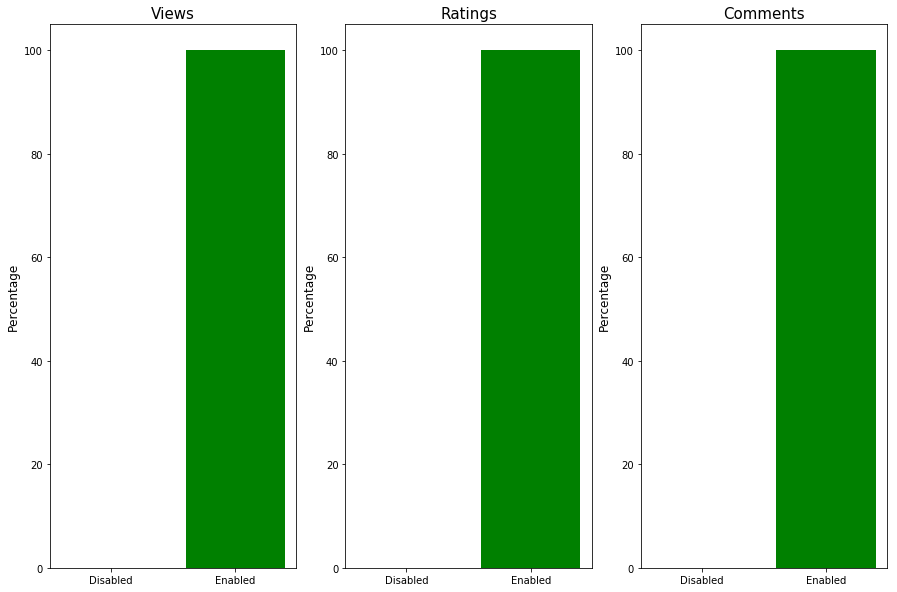

In [14]:
plt.figure(num=5, figsize=(15,10))
for y, stat, subplt in zip(y, ['Views', 'Ratings', 'Comments'], range(1,4)):
    plt.subplot(1, 3, subplt)
    plt.bar(['Disabled', 'Enabled'], [y, 100-y], color=['r','g'])
    plt.title(stat, fontsize=15)
    plt.ylabel('Percentage', fontsize=12) #Becauses there's exactly 100 videos, Numbers of videos enabled/disabled = Percentage of videos enabled/disabled
plt.show()

### Ratings
**Disclaimer**: For this example, we are not taking into account any videos with disabled ratings.

Let's check the combined rating of our data using a pie chart...

In [15]:
average_rating = sum(data.video_rating)/100

if average_rating > 85:
    one = "overwhelmingly positive"
elif average_rating < 50:
    one = "overwhelmingly negative"
else:
    one = "mixed"

if average_rating > 85:
    two = "are well-received (or there's very few videos with poor feedback)"
elif average_rating < 50:
    two = "aren't well-received"
else:
    two = "get mixed reactions"

if average_rating > 85:
    three = "good and are liked by the majority of the public"
elif average_rating < 50:
    three = "not good and might have something wrong with them like misleading title or bad content"
else:
    three = "a mixed bag but are generally questionable (it might also just be a few videos with poor feedback)"  

output = 'The ratings are {}. These videos {} by the public which suggest that the videos are {}.'.format(one,two,three)

{{output}}

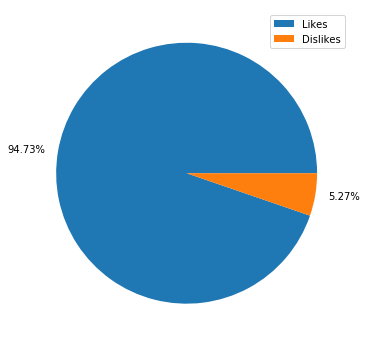

In [16]:
plt.figure(num=6, figsize=(6,6))
plt.pie((average_rating, 100-average_rating),
        labels=['{:2.2f}%'.format(average_rating), '{:2.2f}%'.format(100-average_rating)])
plt.legend(['Likes', 'Dislikes'])
plt.show()